In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime

In [2]:
%matplotlib inline

In [3]:
SUN = "Sunday"
MON = "Monday"
TUE = "Tuesday"
WED = "Wednesday"
THU = "Thursday"
FRI = "Friday"
SAT = "Saturday"

WEEK = [SUN, MON, TUE, WED, THU, FRI, SAT]
WORK_WEEK = [MON, TUE, WED, THU, FRI]

In [4]:
FILENAME = 'tyme_20170101-20171231.csv'

def read_data(name=FILENAME):
    data = pd.read_csv(name)
    return data

def get_start_hours(filter=None):
    data = read_data()
    complete_data = {
        SUN: [0]*24,
        MON: [0]*24,
        TUE: [0]*24,
        WED: [0]*24,
        THU: [0]*24,
        FRI: [0]*24,
        SAT: [0]*24,
    }
    
    columns = list(data.columns.values)
    day_index = columns.index("day")
    project_index = columns.index("project")
    task_index = columns.index("task")
    start_index = columns.index("start")
    
    for row in data.values:
        day = row[day_index]
        project = row[project_index]
        task = row[task_index]
        start = row[start_index]

        if (filter == None or filter == task):
            start_time = datetime.datetime.strptime(start, '%I:%M %p')
            complete_data[day][start_time.hour] += 1
    return complete_data

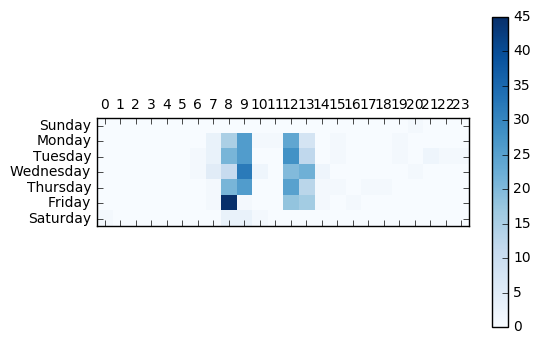

In [5]:
fig = plt.figure()

ax = fig.add_subplot(111)

WEEK_TYPE = WEEK

start_hours = get_start_hours("SkinIO")
hour_precision = len(start_hours[MON])
time_labels = range(hour_precision)

df = list(map(lambda day: start_hours[day], WEEK_TYPE))

cax = ax.matshow(df, interpolation='nearest', cmap='Blues')
fig.colorbar(cax)

tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

ax.set_xticklabels([''] + list(time_labels)) 
ax.set_yticklabels([''] + list(WEEK_TYPE))

plt.show()